In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from typing import List, Dict

In [2]:
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbCallback  

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: prayagpiya12 (prayagpiya12-lakehead-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

message_loop has been closed
Traceback (most recent call last):
  File "d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\wandb\sdk\lib\sock_client.py", line 208, in _read_packet_bytes
    data = self._sock.recv(self._bufsize)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\wandb\sdk\interface\router_sock.py", line 27, in _read_message
    return self._sock_client.read_server_response(timeout=1)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\wandb\sdk\lib\sock_client.py", line 235, in read_server_response
    data = self._read_packet_bytes(timeout=timeout)
       

In [4]:
wandb.init(project="Early_Diabetes_Prediciton", name=f"Transfer_Learning",  config={"epochs": 50, "batch_size": 32, "architecture": "MultiHeadAttention", "dataset": "Diabetes", "learning_rate": 0.001}, resume="allow")

In [5]:
artifact = wandb.Artifact('Early_Diabetes', type='model')

In [6]:
diabetes_prediction = pd.read_csv("data_source/diabetes_prediction_dataset.csv")
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
diabetes_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
diabetes_prediction.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

# Proocessing Object value and age.
Group the age according to the _AGEG5YR \
Changing smoking habit to three category

In [9]:
def process_smoking_habit(habit: str) -> str:
  if habit == "never" or habit == "ever":
    return "non-smoker"
  elif habit == "former" or habit == "current" or habit == "not current":
    return "smoker"
  elif habit == "No Info":
    return "unknown"

diabetes_prediction["smoking_history"] = diabetes_prediction["smoking_history"].apply(process_smoking_habit)
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,smoker,23.45,5.0,155,0
4,Male,76.0,1,1,smoker,20.14,4.8,155,0


In [10]:
def categorical_age(age: int) -> int:
    age_ranges = [(18, 24), (25, 29), (30, 34), (35, 39), (40, 44),
                  (45, 49), (50, 54), (55, 59), (60, 64), (65, 69),
                  (70, 74), (75, 79), (80, float("inf"))]

    for idx, (start, end) in enumerate(age_ranges, start=1):
        if start <= age <= end:
            return idx
    return 0
diabetes_prediction["age"] = diabetes_prediction["age"].apply(categorical_age)
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,13,0,1,non-smoker,25.19,6.6,140,0
1,Female,7,0,0,unknown,27.32,6.6,80,0
2,Male,2,0,0,non-smoker,27.32,5.7,158,0
3,Female,4,0,0,smoker,23.45,5.0,155,0
4,Male,12,1,1,smoker,20.14,4.8,155,0


<Axes: xlabel='smoking_history', ylabel='count'>

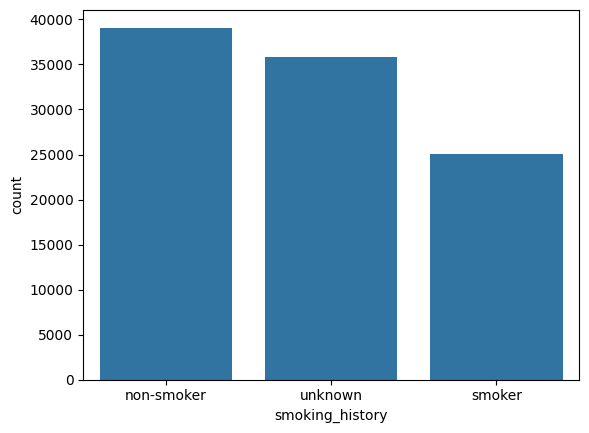

In [11]:
sns.barplot(data=diabetes_prediction["smoking_history"].value_counts())

In [12]:
diabetes_prediction.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

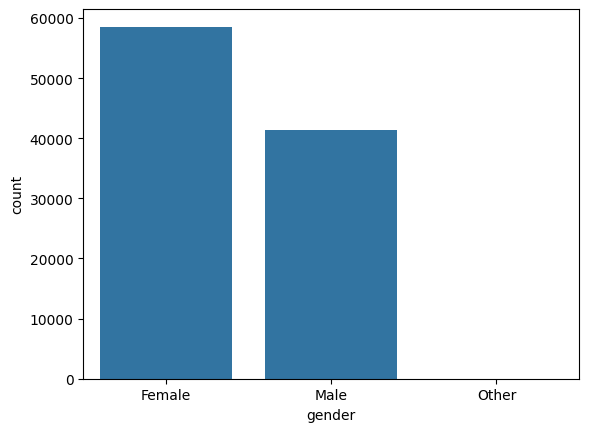

In [13]:
sns.barplot(data=diabetes_prediction["gender"].value_counts())

<Axes: xlabel='diabetes', ylabel='age'>

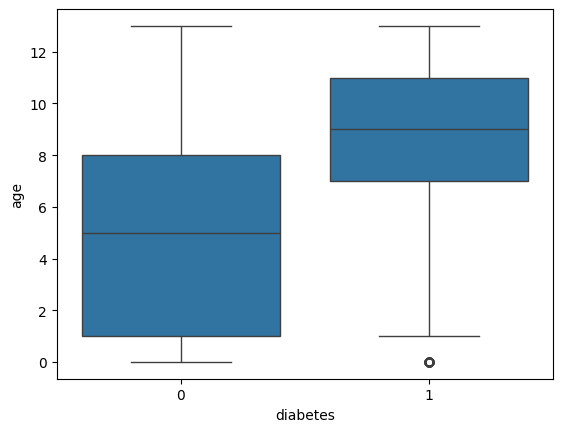

In [14]:
sns.boxplot(data=diabetes_prediction, x="diabetes", y="age")

<Axes: xlabel='diabetes', ylabel='age'>

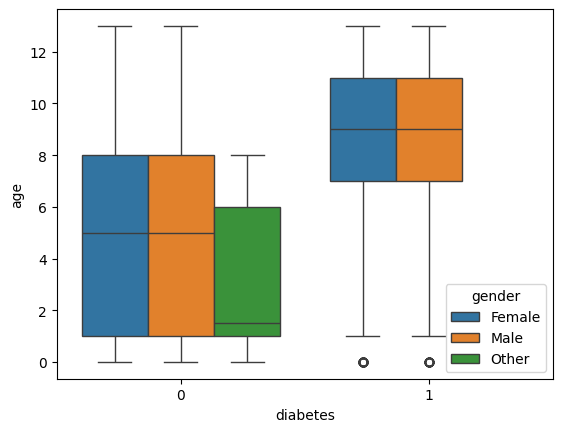

In [15]:
sns.boxplot(data=diabetes_prediction, x="diabetes", y="age", hue="gender")

In [16]:
diabetes_prediction.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='bmi'>

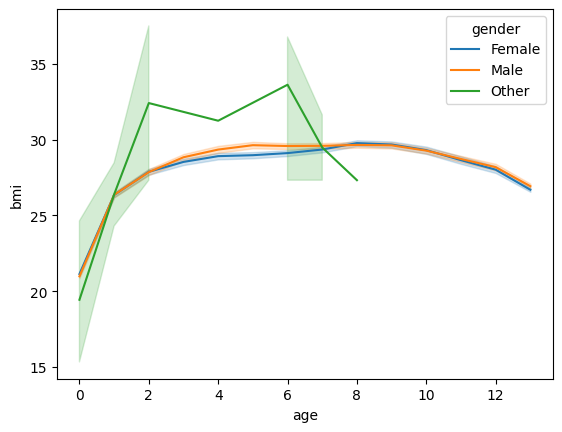

In [17]:
sns.lineplot(data=diabetes_prediction, x="age", y="bmi", hue="gender")

C:\Users\Peanutmonster\AppData\Local\Temp\ipykernel_25280\3780642373.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=diabetes_prediction[diabetes_prediction['diabetes'] == 0]['bmi'], label='Outcome = 0', color="mediumaquamarine", shade=True)
C:\Users\Peanutmonster\AppData\Local\Temp\ipykernel_25280\3780642373.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=diabetes_prediction[diabetes_prediction['diabetes'] == 1]['bmi'], label='Outcome = 1', color="salmon", shade=True)


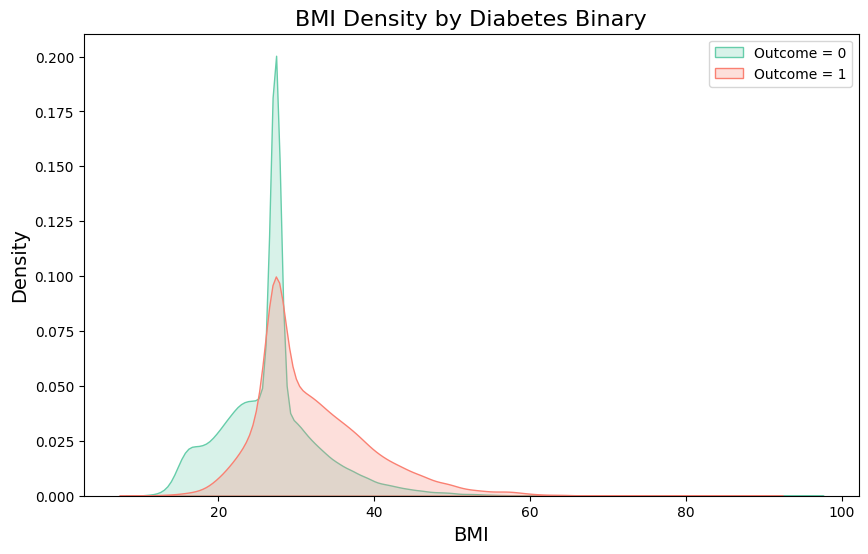

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=diabetes_prediction[diabetes_prediction['diabetes'] == 0]['bmi'], label='Outcome = 0', color="mediumaquamarine", shade=True)
sns.kdeplot(data=diabetes_prediction[diabetes_prediction['diabetes'] == 1]['bmi'], label='Outcome = 1', color="salmon", shade=True)
plt.title('BMI Density by Diabetes Binary', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diabetes_prediction["gender"] = le.fit_transform(diabetes_prediction["gender"])
diabetes_prediction["smoking_history"] = le.fit_transform(diabetes_prediction["smoking_history"])
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,13,0,1,0,25.19,6.6,140,0
1,0,7,0,0,2,27.32,6.6,80,0
2,1,2,0,0,0,27.32,5.7,158,0
3,0,4,0,0,1,23.45,5.0,155,0
4,1,12,1,1,1,20.14,4.8,155,0


Text(0.5, 1.0, 'Correlation Heatmap')

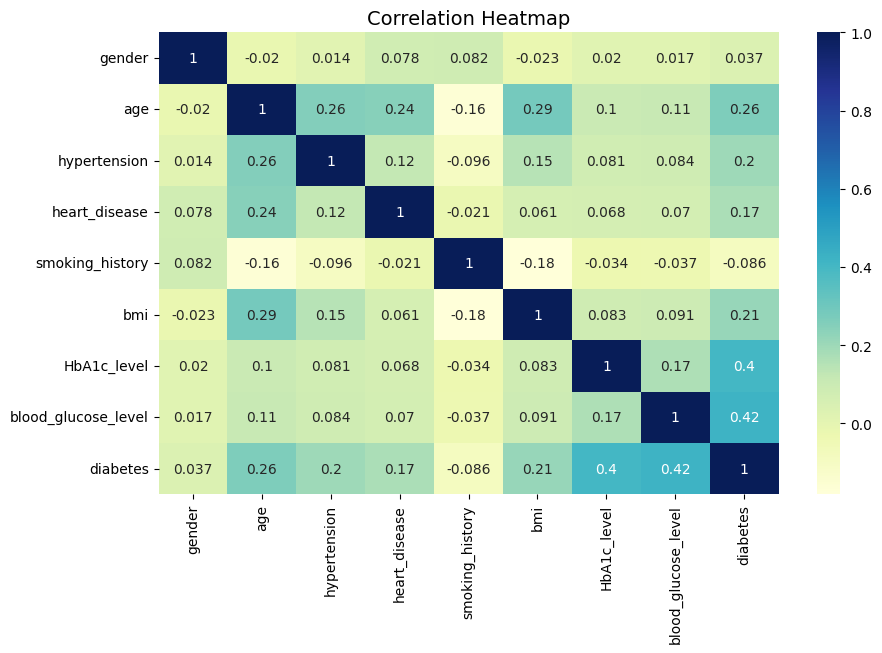

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=diabetes_prediction.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=14)

In [21]:
x1, y1 = diabetes_prediction.drop("diabetes", axis=1), diabetes_prediction["diabetes"]

In [2]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [3]:
def sample_dataset(X, y):
  X_resampled, y_resampled = smote.fit_resample(X, y)
  return X_resampled, y_resampled

In [24]:
x1, y1 = sample_dataset(x1, y1)

In [25]:
print("Dataset 1")
print(y1.value_counts())

Dataset 1
diabetes
0    91500
1    91500
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x1 = std.fit_transform(x1)

In [27]:
x1

array([[-0.77828545,  1.55684831, -0.31598345, ..., -0.57402667,
         0.3585165 , -0.41217491],
       [-0.77828545,  0.04383736, -0.31598345, ..., -0.28596446,
         0.3585165 , -1.4647131 ],
       [ 1.28380083, -1.2170051 , -0.31598345, ..., -0.28596446,
        -0.36220432, -0.09641346],
       ...,
       [ 1.28380083,  0.54817434, -0.31598345, ..., -0.21476264,
         2.1202785 ,  0.64036327],
       [-0.77828545,  1.05251132, -0.31598345, ...,  1.16600147,
         0.04417194,  2.04374752],
       [-0.77828545,  1.05251132, -0.31598345, ..., -0.29218755,
         1.89918549, -0.65776715]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, stratify=y1, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import MultiHeadAttention, Dense, BatchNormalization, Dropout, InputLayer

In [ ]:
from tensorflow.keras.utils import register_keras_serializable

@register_keras_serializable()
class MultiHeadAttentionFCN(keras.Model):
    def __init__(self, input_dim: int, num_head: int, hidden_unit: int, output_dim: int, **kwargs) -> None:
        super(MultiHeadAttentionFCN, self).__init__(**kwargs)

        self.input_dim = input_dim
        self.num_head = num_head
        self.hidden_unit = hidden_unit
        self.output_dim = output_dim
        self.layer_info = {}

        self.layer_info["attention"] = MultiHeadAttention(num_heads=num_head, key_dim=self.hidden_unit)


        self.layer_info["dense_layer"] = Dense(126, activation='relu', name="Dense1")
        self.layer_info["batch_norm"] = BatchNormalization()
        self.layer_info["dense_layer_one"] = Dense(64, activation='relu', name="Dense2")
        self.layer_info["dropout"] = Dropout(0.2)
        self.layer_info["dense_layer_two"] = Dense(32, activation="relu", name="Dense3")
        self.layer_info["dropout_one"] = Dropout(0.2)
        self.layer_info["dense_layer_three"] = Dense(16, activation="relu", name="Dense4")
        self.layer_info["dropout_two"] = Dropout(0.2)
        self.layer_info["dense_layer_four"] = Dense(1, activation="relu", name="Dense5")
        self.layer_info["dropout_three"] = Dropout(0.2)

        self.layer_info["output"] = Dense(self.output_dim, activation="sigmoid", name="Output")

    @property
    def extract_hidden_layer(self) -> dict:
        return {k:v for k, v in self.layer_info.items() if k != "output"}

    def build(self, input_shape) -> None:
        seq_len = 1
        feature_dim = input_shape[-1]
        self.layer_info["attention"].build((None, seq_len, feature_dim),
                          (None, seq_len, feature_dim),
                          (None, seq_len, feature_dim))
        self.layer_info["dense_layer"].build((None, input_shape[-1]))
        self.layer_info["batch_norm"].build((None, 126))
        self.layer_info["dense_layer_one"].build((None, 126))
        self.layer_info["dropout"].build((None, 64))
        self.layer_info["dense_layer_two"].build((None, 64))
        self.layer_info["dropout_one"].build((None, 32))
        self.layer_info["dense_layer_three"].build((None, 32))
        self.layer_info["dropout_two"].build((None, 16))
        self.layer_info["dense_layer_four"].build((None, 16))
        self.layer_info["dropout_three"].build((None, 1))


        self.layer_info["output"].build((None, self.output_dim))

        self.built = True


    def call(self, inputs) -> tf.Tensor:
        x = tf.expand_dims(inputs, axis=1)
        x = self.layer_info["attention"](query=x, value=x)
        x = tf.squeeze(x, axis=1)

        x = self.layer_info["dense_layer"](x)
        x = self.layer_info["batch_norm"](x)
        x = self.layer_info["dense_layer_one"](x)
        x = self.layer_info["dropout"](x)
        x = self.layer_info["dense_layer_two"](x)
        x = self.layer_info["dropout_one"](x)
        x = self.layer_info["dense_layer_three"](x)
        x = self.layer_info["dropout_two"](x)
        x = self.layer_info["dense_layer_four"](x)
        x = self.layer_info["dropout_three"](x)

        return self.layer_info["output"](x)
    
    def get_config(self) -> dict:
        config = super().get_config()
        config.update({
            "input_dim": self.input_dim,
            "num_head": self.num_head,
            "hidden_unit": self.hidden_unit,
            "output_dim": self.output_dim
        })
        return config
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [31]:
model = MultiHeadAttentionFCN(input_dim=8, num_head=7, hidden_unit=32, output_dim=1)
model.build(input_shape=(None, 8))

In [32]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

In [33]:
model.summary()

Model: "multi_head_attention_fcn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ multi_head_attention            │ (None, 1, 8)           │         7,848 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 126)            │         1,134 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense5 (Dense)                  │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,241 (79.07 KB)

 Trainable params: 19,989 (78.08 KB)

 Non-trainable params: 252 (1008.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback
import time

early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 16,
    restore_best_weights = True
)

lr_adjustment = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 8,
    min_lr = 1e-7
)


class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.train_start_time = time.time()

    def on_train_end(self, logs=None):
        total_time = time.time() - self.train_start_time
        print(f"Total Training Time: {total_time:.2f} seconds")

time_callback = TimeHistory()

In [35]:
history = model.fit(
    X_train1, y_train1,
    epochs=50,
    batch_size=32,
    validation_data=(X_test1, y_test1),
    callbacks=[
        early_stop,
        lr_adjustment,
        time_callback,
        WandbCallback(
            save_model=False,
            log_weights=True,
            log_evaluation=True,
        ),
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="models/Early_Diabetes.keras")
    ]
)

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.
wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8753 - loss: 0.3591 - val_accuracy: 0.9037 - val_loss: 0.2200 - learning_rate: 0.0010
Epoch 2/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9057 - loss: 0.2089 - val_accuracy: 0.9090 - val_loss: 0.1947 - learning_rate: 0.0010
Epoch 3/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9103 - loss: 0.1870 - val_accuracy: 0.9134 - val_loss: 0.1767 - learning_rate: 0.0010
Epoch 4/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9123 - loss: 0.1826 - val_accuracy: 0.9137 - val_loss: 0.1806 - learning_rate: 0.0010
Epoch 5/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9161 - loss: 0.1731 - val_accuracy: 0.9128 - val_loss: 0.1769 - learning_rate: 0.0010
Epoch 6/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9190 - loss: 0.1679 - val_accuracy: 0.9203 - val_loss: 0.1648 - learning_rate: 0.0010
Epoch 7/50
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9

In [36]:
model.save("models/model_one.keras")

In [37]:
wandb.finish()

accuracy,▁▂▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
epoch/accuracy,▁▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▅▆▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█████
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch/learning_rate,███████████████████████████████████▁▁▁▁▁
epoch/loss,█▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▂▂▂▂▂▃▄▄▄▅▅▄▅▅▅▅▅▅▅▆▅▆▆▆▆▅▆▆▆▆▆▆▅▆█████
epoch/val_loss,█▇▆▆▆▅▆▄▄▄▄▄▄▃▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▃▃▂▁▁▁▁▁
learning_rate,███████████████████████████████████▁▁▁▁▁
loss,█▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▂▂▂▃▃▄▄▄▃▅▄▅▄▅▅▅▅▅▆▅▆▆▆▅▅▆▆▆▆▆▆▆▅▆█████


In [38]:
from tensorflow.keras.models import load_model
model_one = load_model("models/model_one.keras", custom_objects={"MultiHeadAttentionFCN": MultiHeadAttentionFCN})

In [39]:
model.evaluate(X_test1, y_test1)[1] * 100

1144/1144 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9553 - loss: 0.0950


95.68852186203003

In [40]:
layers = model.extract_hidden_layer
print(layers)

{'attention': <MultiHeadAttention name=multi_head_attention, built=True>, 'dense_layer': <Dense name=Dense1, built=True>, 'batch_norm': <BatchNormalization name=batch_normalization, built=True>, 'dense_layer_one': <Dense name=Dense2, built=True>, 'dropout': <Dropout name=dropout, built=True>, 'dense_layer_two': <Dense name=Dense3, built=True>, 'dropout_one': <Dropout name=dropout_1, built=True>, 'dense_layer_three': <Dense name=Dense4, built=True>, 'dropout_two': <Dropout name=dropout_2, built=True>, 'dense_layer_four': <Dense name=Dense5, built=True>, 'dropout_three': <Dropout name=dropout_3, built=True>}


In [4]:
brfss = pd.read_csv("data_source/diabetes_binary_health_indicators_BRFSS2015.csv")
brfss.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
brfss.Diabetes_binary.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [43]:
brfss.Sex.value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

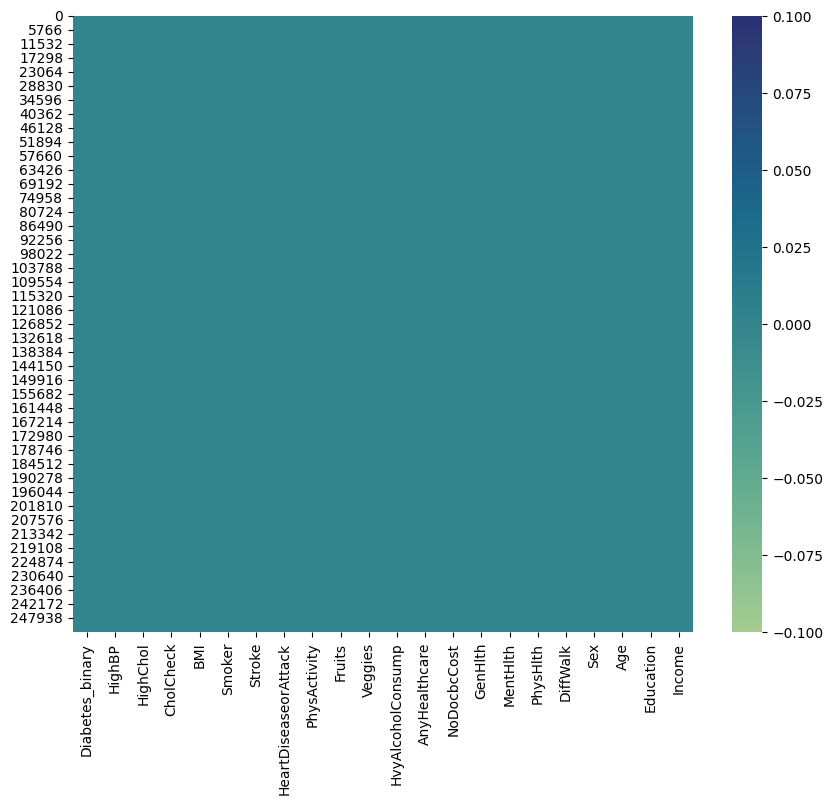

In [44]:
plt.figure(figsize=(10, 8))

sns.heatmap(brfss.isnull(), cmap="crest")

plt.show()

C:\Users\Peanutmonster\AppData\Local\Temp\ipykernel_25280\2657923437.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=brfss[brfss['Diabetes_binary'] == 0]['BMI'], label='Diabetes_binary = 0', color="mediumaquamarine", shade=True)
C:\Users\Peanutmonster\AppData\Local\Temp\ipykernel_25280\2657923437.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=brfss[brfss['Diabetes_binary'] == 1]['BMI'], label='Diabetes_binary = 1', color="salmon", shade=True)


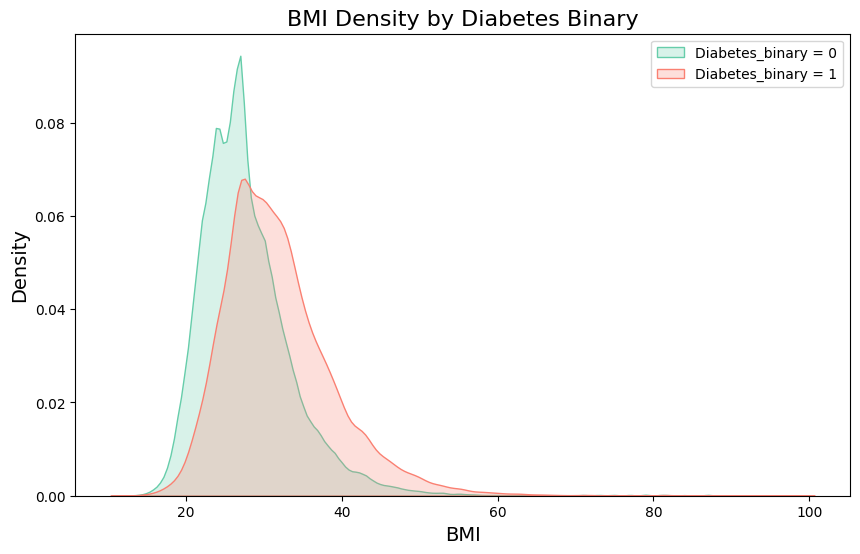

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=brfss[brfss['Diabetes_binary'] == 0]['BMI'], label='Diabetes_binary = 0', color="mediumaquamarine", shade=True)
sns.kdeplot(data=brfss[brfss['Diabetes_binary'] == 1]['BMI'], label='Diabetes_binary = 1', color="salmon", shade=True)
plt.title('BMI Density by Diabetes Binary', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

In [46]:
brfss.Smoker.value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

<Axes: xlabel='Diabetes_binary', ylabel='Age'>

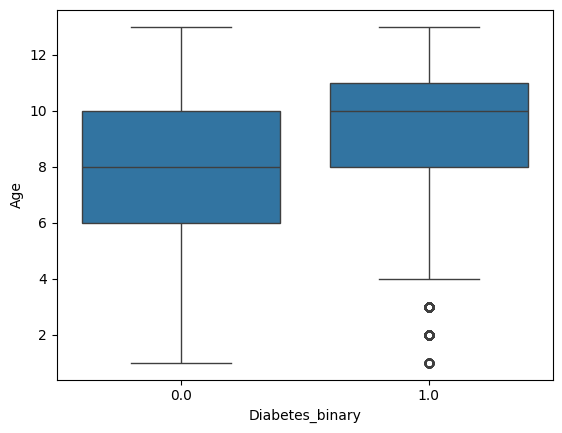

In [47]:
sns.boxplot(data=brfss, x="Diabetes_binary", y="Age")

<Axes: xlabel='Diabetes_binary', ylabel='Age'>

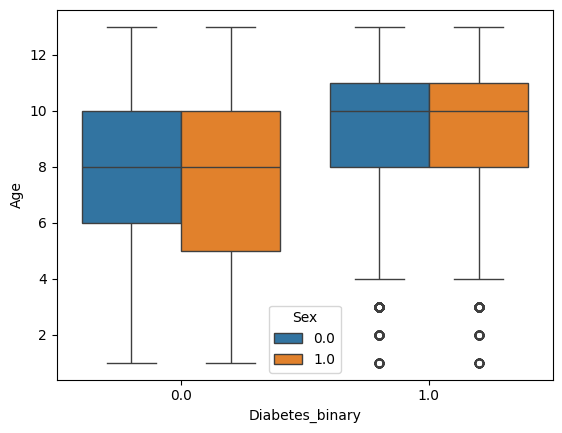

In [48]:
sns.boxplot(data=brfss, x="Diabetes_binary", y="Age", hue="Sex")

Text(0.5, 1.0, 'Correlation Heatmap')

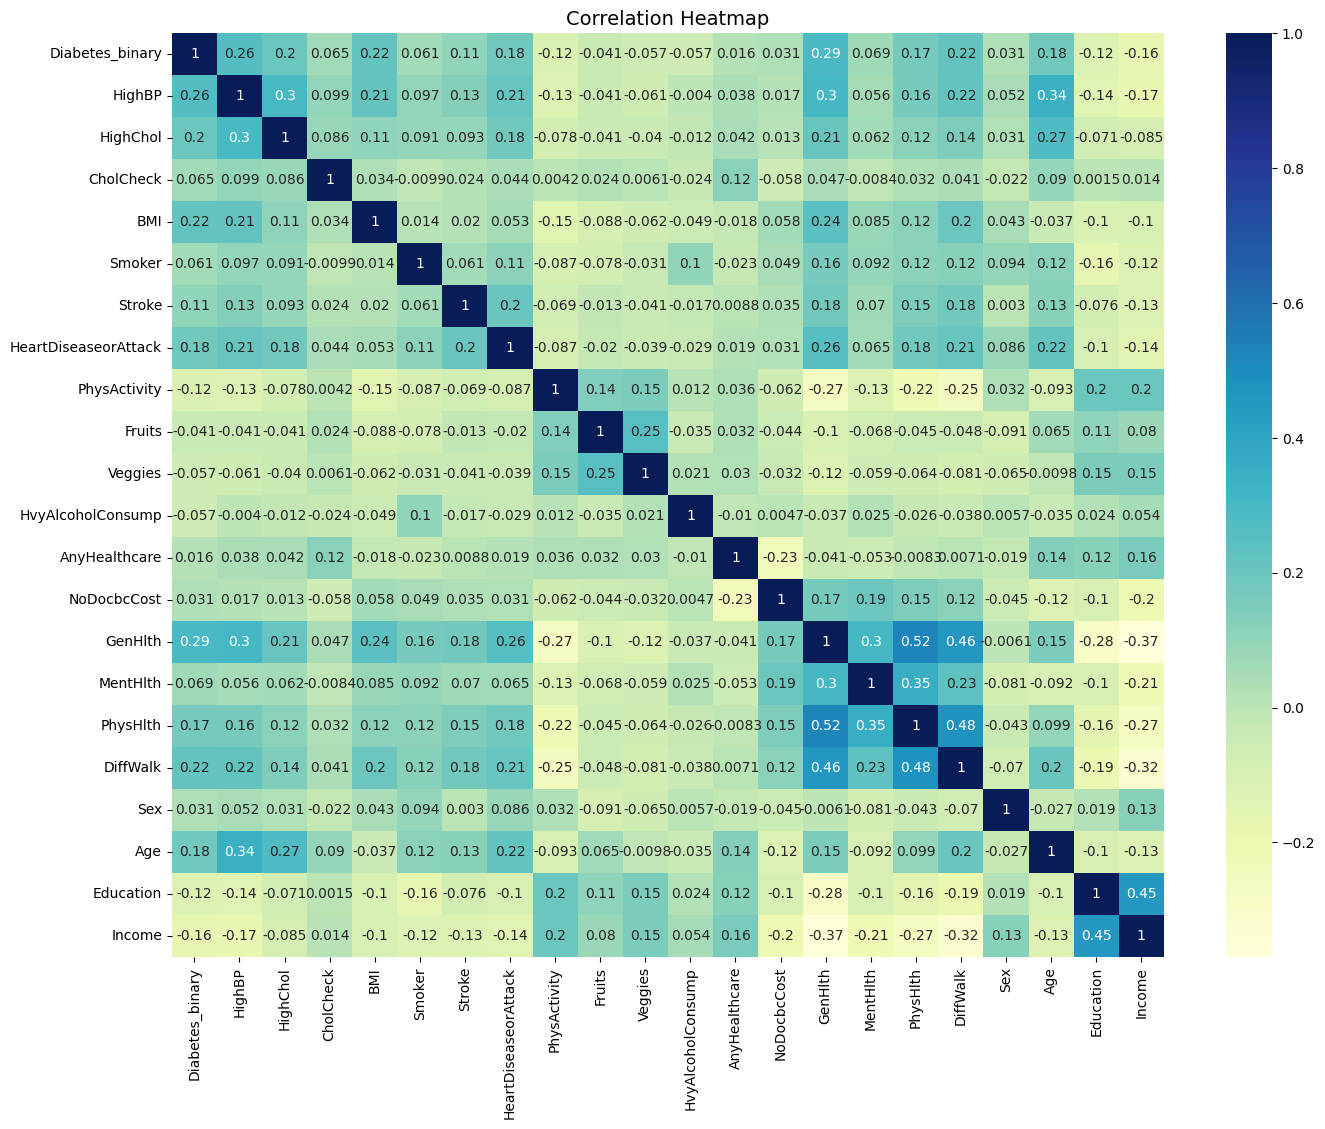

In [49]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=brfss.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=14)

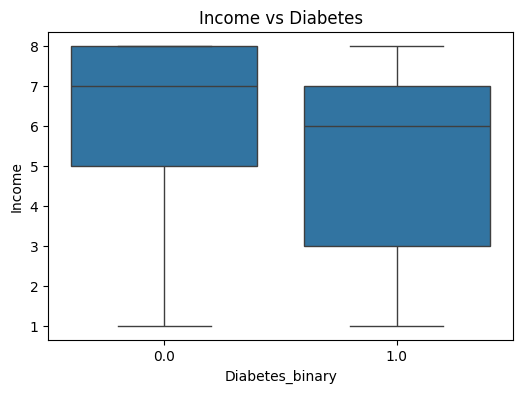

In [50]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Diabetes_binary", y= "Income", data=brfss)
plt.title('Income vs Diabetes')
plt.show()

In [51]:
x2, y2 = brfss.drop("Diabetes_binary", axis=1), brfss["Diabetes_binary"]
x2, y2 = sample_dataset(x2, y2)

d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Peanutmonster\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Peanutmonster\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, e

In [52]:
print("Dataset 2")
print(y2.value_counts())

Dataset 2
Diabetes_binary
0.0    218334
1.0    218334
Name: count, dtype: int64


In [53]:
x2 = std.fit_transform(x2)

In [54]:
x2

array([[ 0.89016092,  0.96819152,  0.15847172, ...,  0.13874968,
        -0.93731012, -1.26035968],
       [-1.19450288, -1.11283155, -6.49822268, ..., -0.56966768,
         1.07763409, -2.18978449],
       [ 0.89016092,  0.96819152,  0.15847172, ...,  0.13874968,
        -0.93731012,  1.06320236],
       ...,
       [ 0.89016092,  0.96819152,  0.15847172, ...,  0.49295836,
        -1.53385437, -0.1413879 ],
       [-1.15289876, -1.11283155,  0.15847172, ...,  0.50002738,
        -0.95741648, -1.2510853 ],
       [ 0.89016092,  0.96819152,  0.15847172, ...,  0.30465938,
        -0.40173327, -0.57797813]])

In [8]:
from keras.saving import serialize_keras_object, deserialize_keras_object

In [ ]:
@register_keras_serializable()
class TransferAttention(keras.Model):
    def __init__(self, hidden_layer: List[tensorflow.keras.layers], input_dim: int, num_head: int, hidden_unit: int, output_dim: int, layer_name: str, **kwargs) -> None:
        super(TransferAttention, self).__init__(**kwargs)

        self.hidden_layers = hidden_layer
        self.input_dim = input_dim
        self.num_head = num_head
        self.hidden_unit = hidden_unit
        self.output_dim = output_dim
        self.layer_info = {}
        self.layer_name = layer_name

        for layer in self.hidden_layers:
            layer.trainable = False
            self.layer_info[layer.name] = layer

        self.layer_info[layer_name+"_attention"] = MultiHeadAttention(num_heads=num_head, key_dim=hidden_unit)


        self.layer_info[layer_name+"_dense_layer"] = Dense(126, activation='relu', name=self.layer_name+"Dense1")
        self.layer_info[layer_name+"_batch_norm"] = BatchNormalization()
        self.layer_info[layer_name+"_dense_layer_one"] = Dense(64, activation='relu', name=self.layer_name+"Dense2")
        self.layer_info[layer_name+"_dropout"] = Dropout(0.2)
        self.layer_info[layer_name+"_dense_layer_two"] = Dense(32, activation="relu", name=self.layer_name+"Dense3")
        self.layer_info[layer_name+"_dropout_one"] = Dropout(0.2)
        self.layer_info[layer_name+"_dense_layer_three"] = Dense(16, activation="relu", name=self.layer_name+"Dense4")
        self.layer_info[layer_name+"_dropout_two"] = Dropout(0.2)
        self.layer_info[layer_name+"_dense_layer_four"] = Dense(1, activation="relu", name=self.layer_name+"Dense5")
        self.layer_info[layer_name+"_dropout_three"] = Dropout(0.2)

        self.layer_info[layer_name+"_output"] = Dense(self.output_dim, activation="sigmoid", name=self.layer_name+"Output")

    @property
    def extract_hidden_layer(self) -> dict:
        return {k:v for k, v in self.layer_info.items() if k != "tl_output"}

    def build(self, input_shape, training=False) -> None:
        seq_len = 1
        feature_dim = input_shape[-1]


        self.layer_info[self.layer_name+"_attention"].build((None, seq_len, feature_dim),
                          (None, seq_len, feature_dim),
                          (None, seq_len, feature_dim))
        self.layer_info[self.layer_name+"_dense_layer"].build((None, input_shape[-1]))
        self.layer_info[self.layer_name+"_batch_norm"].build((None, 126))
        self.layer_info[self.layer_name+"_dense_layer_one"].build((None, 126))
        self.layer_info[self.layer_name+"_dropout"].build((None, 64))
        self.layer_info[self.layer_name+"_dense_layer_two"].build((None, 64))
        self.layer_info[self.layer_name+"_dropout_one"].build((None, 32))
        self.layer_info[self.layer_name+"_dense_layer_three"].build((None, 32))
        self.layer_info[self.layer_name+"_dropout_two"].build((None, 16))
        self.layer_info[self.layer_name+"_dense_layer_four"].build((None, 16))
        self.layer_info[self.layer_name+"_dropout_three"].build((None, 1))


        self.layer_info[self.layer_name+"_output"].build((None, self.output_dim))

        self.built = True


    def call(self, inputs) -> tf.Tensor:
        x = tf.expand_dims(inputs, axis=1)
        x = self.layer_info[self.layer_name+"_attention"](query=x, value=x)
        x = tf.squeeze(x, axis=1)

        x = self.layer_info[self.layer_name+"_dense_layer"](x)
        x = self.layer_info[self.layer_name+"_batch_norm"](x)
        x = self.layer_info[self.layer_name+"_dense_layer_one"](x)
        x = self.layer_info[self.layer_name+"_dropout"](x)
        x = self.layer_info[self.layer_name+"_dense_layer_two"](x)
        x = self.layer_info[self.layer_name+"_dropout_one"](x)
        x = self.layer_info[self.layer_name+"_dense_layer_three"](x)
        x = self.layer_info[self.layer_name+"_dropout_two"](x)
        x = self.layer_info[self.layer_name+"_dense_layer_four"](x)
        x = self.layer_info[self.layer_name+"_dropout_three"](x)

        return self.layer_info[self.layer_name+"_output"](x)
    
    def get_config(self) -> dict:
        config = super().get_config()
        config.update({
            'hidden_layer': [serialize_keras_object(layer) for layer in self.hidden_layers],
            "input_dim": self.input_dim,
            "num_head": self.num_head,
            "hidden_unit": self.hidden_unit,
            "output_dim": self.output_dim,
            "layer_name": self.layer_name,
        })
        return config
    
    @classmethod
    def from_config(cls, config):
        config["hidden_layer"] = [deserialize_keras_object(layer) for layer in config["hidden_layer"]]
        return cls(**config)
        

In [57]:
wandb.login()
wandb.init(project="Early_Diabetes_Prediciton", name=f"Transfer_Learning_Exp_Brfss",  config={"epochs": 10, "batch_size": 32, "architecture": "MultiHeadAttention", "dataset": "Diabetes", "learning_rate": 0.001}, resume="allow")

In [58]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

model_tf = TransferAttention(list(layers.values())[1:-2], input_dim=21, num_head=7, hidden_unit=32, output_dim=1, layer_name="brfss")
model_tf.build((None, 21))

In [59]:
model_tf.compile(loss="binary_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])
model_tf.summary()

Model: "transfer_attention"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 126)            │         1,134 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_2          │ (None, 1, 21)          │        19,509 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense1 (Dense)             │ (None, 126)            │         2,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense2 (Dense)             │ (None, 64)             │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense3 (Dense)             │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense4 (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense5 (Dense)             │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssOutput (Dense)             │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,914 (179.35 KB)

 Trainable params: 33,288 (130.03 KB)

 Non-trainable params: 12,626 (49.32 KB)

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, stratify=y2, random_state=42)


In [61]:
history_brfss = model_tf.fit(X_train2, y_train2, 
                       epochs=50, 
                       batch_size=32, 
                       validation_data=(X_test2, y_test2),
                       callbacks=[
                        early_stop,
                        lr_adjustment,
                        time_callback,
                        WandbCallback(
                            save_model=False,
                            log_weights=True,
                            log_evaluation=True,
                        ),
                        WandbMetricsLogger(),
                        WandbModelCheckpoint(filepath="models/Early_Diabetes.keras")
                    ])

wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - accuracy: 0.7674 - loss: 0.4996 - val_accuracy: 0.8058 - val_loss: 0.4052 - learning_rate: 0.0010
Epoch 2/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.8085 - loss: 0.4000 - val_accuracy: 0.8087 - val_loss: 0.3891 - learning_rate: 0.0010
Epoch 3/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.8155 - loss: 0.3832 - val_accuracy: 0.8112 - val_loss: 0.3851 - learning_rate: 0.0010
Epoch 4/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.8252 - loss: 0.3631 - val_accuracy: 0.8300 - val_loss: 0.3499 - learning_rate: 0.0010
Epoch 5/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.8294 - loss: 0.3521 - val_accuracy: 0.8319 - val_loss: 0.3444 - learning_rate: 0.0010
Epoch 6/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.8322 - loss: 0.3444 - val_accuracy: 0.8317 - val_loss: 0.3410 - learning_rate: 0.0010
Epoch 7/50
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step -

In [62]:
model_tf.save("models/brfss_model.keras")

In [63]:
model_two = load_model("models/brfss_model.keras", custom_objects={"TransferAttention": TransferAttention})

In [64]:
wandb.finish()

accuracy,▁▃▄▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch/accuracy,▁▃▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,████████████████████▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
epoch/loss,█▆▅▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁▂▄▄▅▅▅▅▄▄▅▄▅▄▅▅▅▄▅▅▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███
epoch/val_loss,█▇▇▅▄▄▄▄▄▄▄▄▅▅▄▃▄▃▄▄▄▄▂▂▂▂▂▂▂▂▁▁▁▁▂▂▂▁▁▁
learning_rate,█████████████████████▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
loss,█▆▅▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▂▄▄▅▅▅▅▄▄▅▄▄▅▆▅▅▅▄▆▅▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇███


In [65]:
model_tf.evaluate(X_test2, y_test2)[1] * 100

2730/2730 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8601 - loss: 0.2865


86.12567782402039

In [66]:
tl_layer = model_tf.extract_hidden_layer
tl_layer

{'Dense1': <Dense name=Dense1, built=True>,
 'batch_normalization': <BatchNormalization name=batch_normalization, built=True>,
 'Dense2': <Dense name=Dense2, built=True>,
 'dropout': <Dropout name=dropout, built=True>,
 'Dense3': <Dense name=Dense3, built=True>,
 'dropout_1': <Dropout name=dropout_1, built=True>,
 'Dense4': <Dense name=Dense4, built=True>,
 'dropout_2': <Dropout name=dropout_2, built=True>,
 'brfss_attention': <MultiHeadAttention name=multi_head_attention_2, built=True>,
 'brfss_dense_layer': <Dense name=brfssDense1, built=True>,
 'brfss_batch_norm': <BatchNormalization name=batch_normalization_2, built=True>,
 'brfss_dense_layer_one': <Dense name=brfssDense2, built=True>,
 'brfss_dropout': <Dropout name=dropout_10, built=True>,
 'brfss_dense_layer_two': <Dense name=brfssDense3, built=True>,
 'brfss_dropout_one': <Dropout name=dropout_11, built=True>,
 'brfss_dense_layer_three': <Dense name=brfssDense4, built=True>,
 'brfss_dropout_two': <Dropout name=dropout_12, built

In [67]:
symptom = pd.read_csv("data_source/diabetes_data_upload.csv")

In [68]:
symptom.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [70]:
symptom["class"] = symptom["class"].map({"Positive": 1, "Negative": 0})

In [71]:
X3, y3 = symptom.drop("class", axis=1), symptom["class"]

In [72]:
for i in X3.columns:
    X3[i] = lb.fit_transform(X3[i])

In [73]:
X3.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [74]:
y3.value_counts()

class
1    320
0    200
Name: count, dtype: int64

In [75]:
X3["Age"] = X3["Age"].apply(categorical_age)

Text(0.5, 1.0, 'Correlation Heatmap')

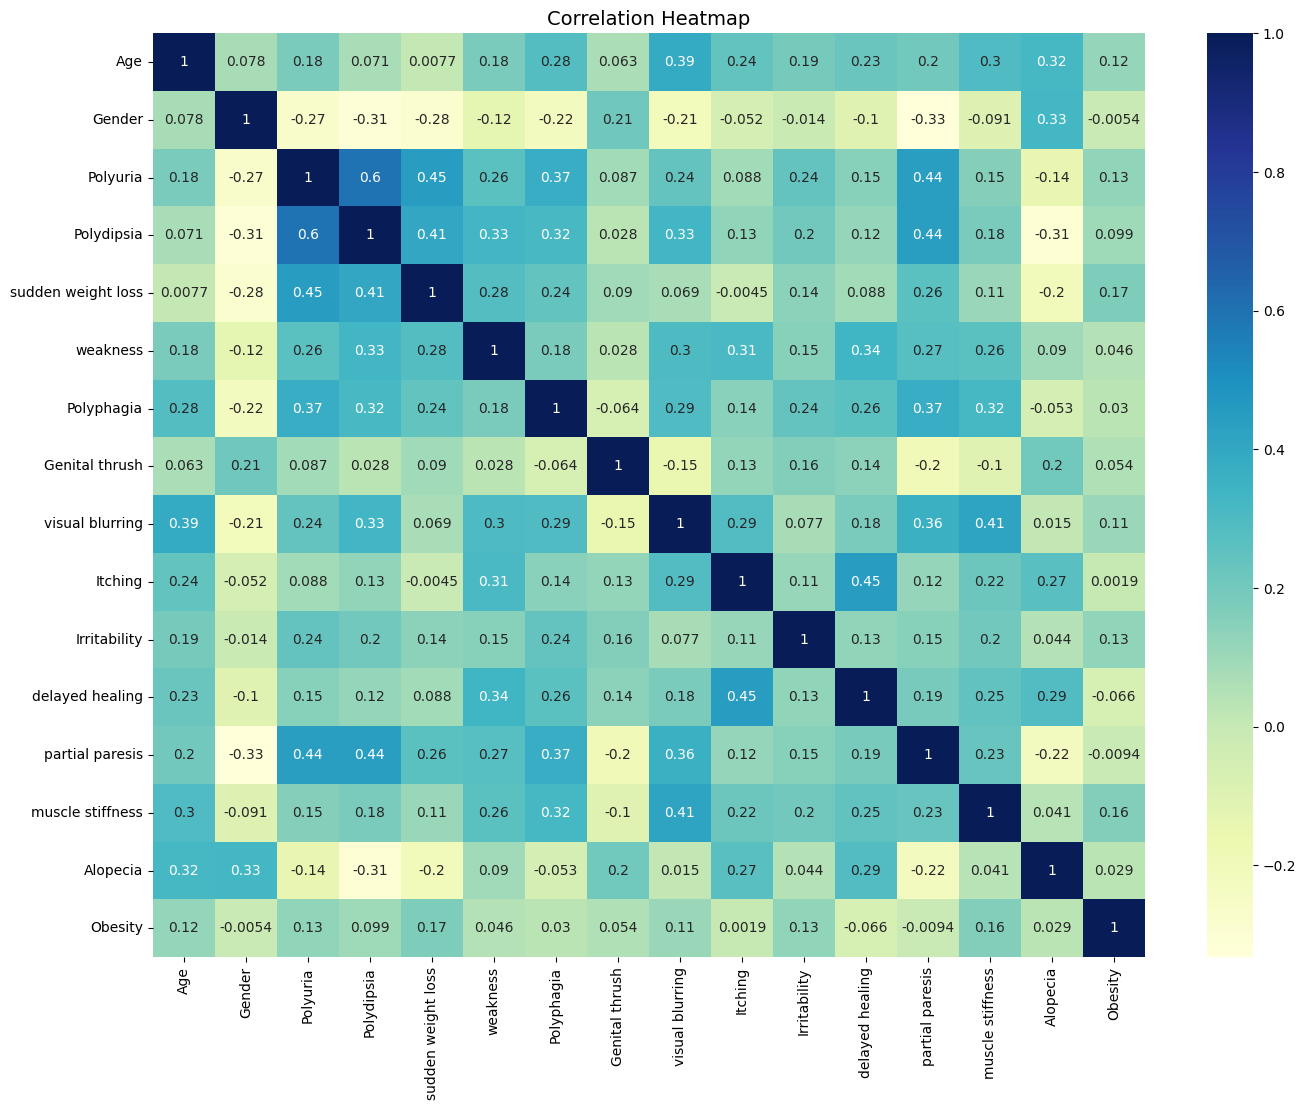

In [76]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=X3.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=14)

In [77]:
X3 = std.fit_transform(X3)

In [78]:
x3, y3 = sample_dataset(X3, y3)

In [79]:
y3

0      1
1      1
2      1
3      1
4      1
      ..
635    0
636    0
637    0
638    0
639    0
Name: class, Length: 640, dtype: int64

In [80]:
y3.value_counts()

class
1    320
0    320
Name: count, dtype: int64

In [83]:
wandb.init(project="Early_Diabetes_Prediciton", name=f"Transfer_Learning_Symptom",  config={"epochs": 50, "batch_size": 32, "architecture": "MultiHeadAttention", "dataset": "Diabetes", "learning_rate": 0.001}, resume="allow")

In [84]:
symptom_model_tf = TransferAttention(hidden_layer=list(tl_layer.values()), input_dim=16, num_head=7, hidden_unit=32, output_dim=1, layer_name="symptom")
symptom_model_tf.build((None, 16))

In [85]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, stratify=y3, random_state=42)

In [86]:
symptom_model_tf.compile(loss="binary_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])
symptom_model_tf.summary()

Model: "transfer_attention_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 126)            │         1,134 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_2          │ (None, 1, 21)          │        19,509 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense1 (Dense)             │ (None, 126)            │         2,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense2 (Dense)             │ (None, 64)             │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense3 (Dense)             │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense4 (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssDense5 (Dense)             │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ brfssOutput (Dense)             │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_4          │ (None, 1, 16)          │        15,024 │
│ (MultiHeadAttention)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ symptomDense1 (Dense)           │ (None, 126)            │         2,142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126)            │           50

 Total params: 74,339 (290.39 KB)

 Trainable params: 28,173 (110.05 KB)

 Non-trainable params: 46,166 (180.34 KB)

In [87]:
history_model = symptom_model_tf.fit(X_train3, y_train3, 
                       epochs=50, 
                       batch_size=32, 
                       validation_data=(X_test3, y_test3),
                       callbacks=[
                        early_stop,
                        lr_adjustment,
                        time_callback,
                        WandbCallback(
                            save_model=False,
                            log_weights=True,
                            log_evaluation=True,
                        ),
                        WandbMetricsLogger(),
                        WandbModelCheckpoint(filepath="models/Early_Diabetes_symptom.keras")
                    ])

wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/50


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4887 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6338 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6544 - loss: 0.5807 - val_accuracy: 0.9688 - val_loss: 0.4350 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9469 - loss: 0.4094 - val_accuracy: 0.9609 - val_loss: 0.3903 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9439 - loss: 0.4167 - val_accuracy: 0.9609 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9585 - loss: 0.3667 - val_accuracy: 0.9531 - val_loss: 0.3712 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9687 - loss: 0.3697 - val_accuracy: 0.9531 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9641 - loss: 0.3358 - val_accuracy: 0.96

In [88]:
model.save("models/symptom_diabetes.keras")

In [89]:
model_three = load_model("models/symptom_diabetes.keras", custom_objects={"TransferAttention": TransferAttention})

In [90]:
wandb.finish()

accuracy,▁▅▇▇████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
epoch/accuracy,▁▅▇▇████████████████████████████████████
epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁███████████████████████████████████████
epoch/val_loss,█▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▆▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁███████████████████████████████████████


In [91]:
symptom_model_tf.layers

[<Dense name=Dense1, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=Dense2, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=Dense3, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=Dense4, built=True>,
 <Dropout name=dropout_2, built=True>,
 <MultiHeadAttention name=multi_head_attention_2, built=True>,
 <Dense name=brfssDense1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dense name=brfssDense2, built=True>,
 <Dropout name=dropout_10, built=True>,
 <Dense name=brfssDense3, built=True>,
 <Dropout name=dropout_11, built=True>,
 <Dense name=brfssDense4, built=True>,
 <Dropout name=dropout_12, built=True>,
 <Dense name=brfssDense5, built=True>,
 <Dropout name=dropout_13, built=True>,
 <Dense name=brfssOutput, built=True>,
 <MultiHeadAttention name=multi_head_attention_4, built=True>,
 <Dense name=symptomDense1, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <De

In [92]:
symptom_model_tf.evaluate(X_test3, y_test3)[1] * 100

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9677 - loss: 0.2149


97.65625

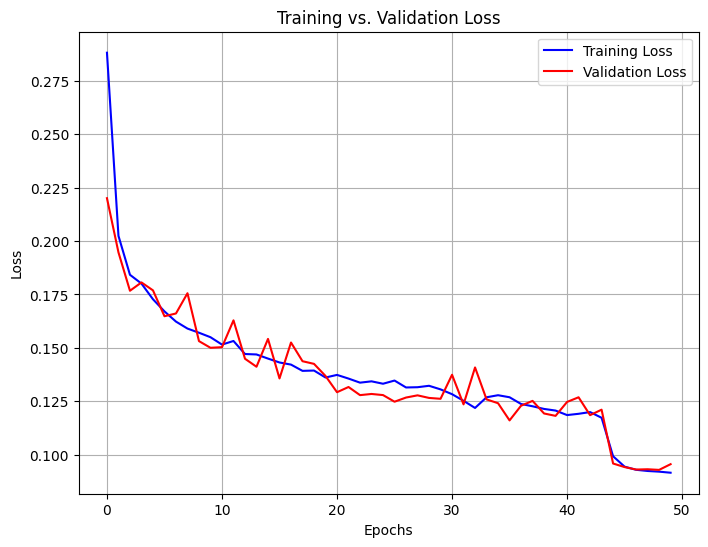

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

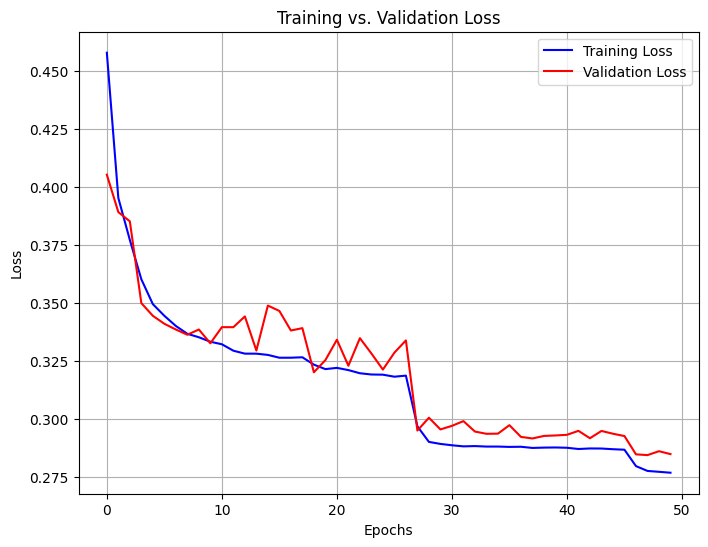

In [94]:
plt.figure(figsize=(8, 6))
plt.plot(history_brfss.history['loss'], label='Training Loss', color='blue')
plt.plot(history_brfss.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

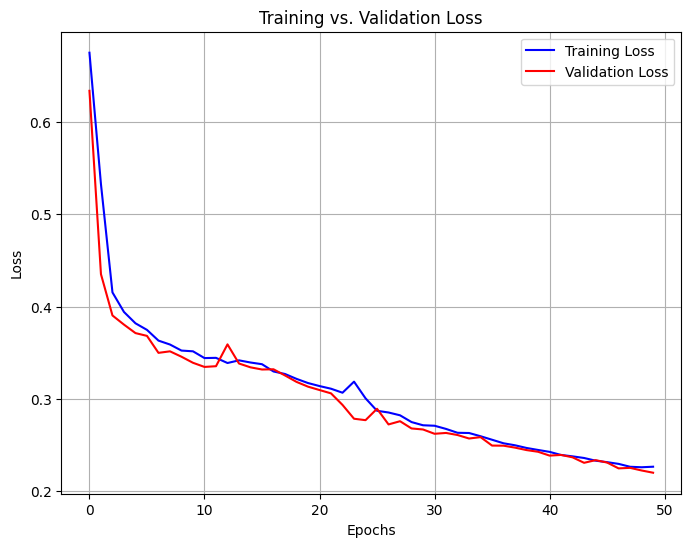

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(history_model.history['loss'], label='Training Loss', color='blue')
plt.plot(history_model.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [105]:
brfss_sample = np.array([[1, 1, 1, 1, 4, 0, 0, 1, 1, 1, 1, 0, 1, 0, 3, 5, 2, 1, 1, 45, 4]], dtype=np.float32)


In [103]:
expected_features = 32  # Adjust based on what your model was trained with

# Ensure input has correct data type and shape
brfss_sample = np.array([[1, 1, 1, 1, 28.5, 0, 0, 1, 1, 1, 1, 0, 1, 0, 3, 5, 2, 1, 1, 45, 4, 3]], dtype=np.float32)

# Pad input if it has fewer features than expected
if brfss_sample.shape[1] < expected_features:
    brfss_sample = np.pad(brfss_sample, ((0, 0), (0, expected_features - brfss_sample.shape[1])), mode='constant')

# Ensure it's shaped correctly for prediction
brfss_sample = brfss_sample.reshape(1, -1)

In [106]:
prediction = model_two.predict(brfss_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [119]:
result = "Diabetic" if prediction[0][0] >= 0.5 else "Non-Diabetic"
result

'Diabetic'

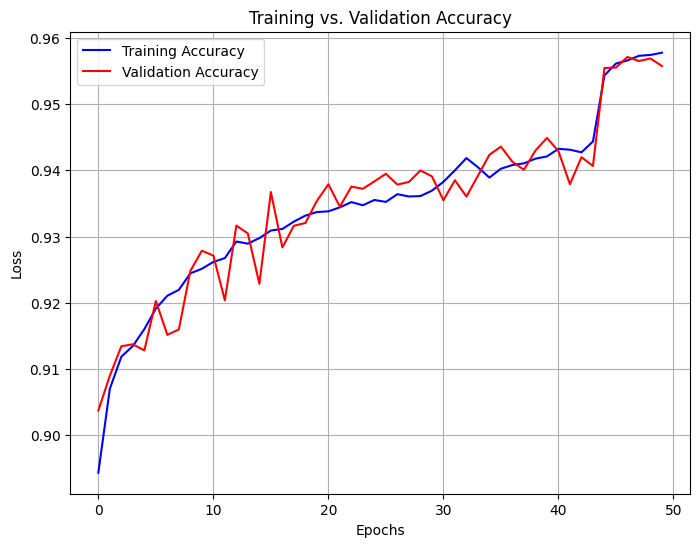

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [126]:
import lime
import lime.lime_tabular

In [133]:
list(diabetes_prediction.columns[:-1])

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [134]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train1,
    mode="classification",
    feature_names=list(diabetes_prediction.columns[:-1]),
    class_names=["Non-Diabetic", "Diabetic"],
    discretize_continuous=True
)

In [138]:
def predict_fn(X):
    preds = model_one.predict(X)
    preds = np.hstack([1 - preds, preds])
    return preds

In [139]:
sample_idx = 10
sample = X_test1[sample_idx].reshape(1, -1) 

explanation = explainer.explain_instance(
    sample[0], 
    predict_fn,
    num_features=10 
)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [140]:
explanation.show_in_notebook()

In [145]:
import shap

d:\Lakehead\Semster2\Research Methology\Early Stage Diabetes\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [146]:
explainer = shap.Explainer(model_one, X_train1)

In [ ]:
shap.summary_plot(shap_values, X_test1, feature_names=list(diabetes_prediction.columns[:-1]))